# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [5]:
# all imports and magic commands
#引入my_measures文件里的函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [6]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [18]:
# ---------------------- 数据处理：function that takes raw data and completes all preprocessing required before model fits !此处为需要修改的函数-------------------------
def process_raw_data(fn, my_random_seed, test=False):
    # ---- read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    # 显示过程
    movie_data = pd.read_csv(fn, sep='\t')
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
  # 意为text = false
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # 进行HasingVectorizer处理： vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    # X_quant_features = movie_data[["word_count", "punc_count"]]
    # print("Look at a few rows of the new quantitative features: ")
    # print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    # X_quant_features_csr = csr_matrix(X_quant_features)
    # X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_combined = hstack([X_tfidf])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [24]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='./moviereviews_train.tsv', my_random_seed=70)
 #此处调用process_raw_data函数
print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Size of combined bag of words and new quantitative variables matrix:
(25000, 131072)
(25000, 131072)
Shape of X_train and X_test:
(20000, 131072)
(5000, 131072)
Shape of y_train and y_test:
(20000,)
(5000,)
Sha

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [25]:
# ---------------- 此处开始调用模型 ----------------
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 5323, 'TN': 4439, 'FP': 5557, 'FN': 4681, 'Accuracy': 0.4881, 'Precision': 0.4892463235294118, 'Recall': 0.5320871651339464, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [30]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [31]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 9603, 'TN': 9830, 'FP': 166, 'FN': 401, 'Accuracy': 0.97165, 'Precision': 0.9830074726174634, 'Recall': 0.9599160335865654, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [33]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [34]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 10004, 'TN': 9996, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10004, 'Neg': 9996, 'TP': 7705, 'TN': 7449, 'FP': 2547, 'FN': 2299, 'Accuracy': 0.7577, 'Precision': 0.751560671088568, 'Recall': 0.7701919232307077, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

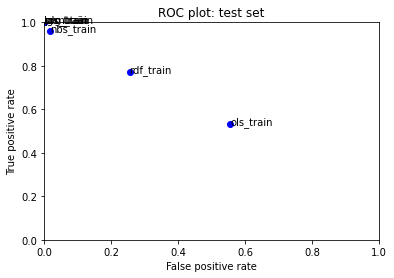

In [36]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [37]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [38]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
0
Very outdated film with awful, cliché-ridden and mawkish dialog and a very poor construction. In addition, Cassavetes and Falk overact constantly. A pseudo \good movie\". It takes no time to discover how catastrophic this intellectual turkey is. The first scene is a total bore, filled with histrionics and hysteric exchanges. The sound is horrible. Camera movements are without imagination as is the building of characters. No poetry, no subtle psychology, no interesting shots. The actors smoke constantly and we see ads for beer beverages. Very cheap, indeed. (one exception : Ned Beattie\"s nice and simple way of playing the hit man)."
* * * * * * * * * 
18
Production line collection of fart jokes that pretends 'Babe' was never made; the writers clearly hoped that the gimmick of seeing animals talk would be enough to keep the movie going. It's not. Eddie Murphy sells out yet again as a doctor who rediscovers his forgotten childhood gift for understanding the

3065
My dear Lord,what a movie! Let's talk about the \special effects\" first. Don't get me wrong here, I am not one of those effect fanatics but I was truly thinking that superimposition was a practice of the long gone past, mainly the 60's. So for some time I thought they might have recorded this movie a long time ago and it took them forever to cut and release it. But as far as I know they did not have cell phones in the 60's...<br /><br />What I am looking for in movies is mainly a good story with a really good message. Acting is secondary, effects are secondary, I do not even mind a few little inconsistencies. However, in a movies like this bad acting, incredibility, etc. add up to make a bad movie even worse - that's what happened for me with the Celestine Prophecy.<br /><br />My wife said the book was actually really good and even though I am not into all that spiritual stuff I can somehow see that it can be brought across in a believable way - the movie failed to do so.<br /><b

6337
This film is justly famous as one of the most horrible examples of propaganda ever produced. The insistent equation of Jews with disease is simply<br /><br />pathological, and even worse it almost becomes believable for brief seconds<br /><br />through its sheer repetition. The fact that something this crude works, even<br /><br />briefly, is an object lesson in itself. You have to have a strong stomach and a firm grip on yourself to sit through this, and I wouldn't recommend trying unless you have a good reason.
* * * * * * * * * 
6380
Granted, this seems like a good idea. Steve Martin, Goldie Hawn, and John Cleese in a Neil Simon comedy. Where can you go wrong? Watch the movie, and you'll find out.<br /><br />In truth, Martin, the lead, is mis-cast. He's not doing the great slapstick he's known for, from movies like \The Jerk\", but instead plays a sort of in-between character that doesn't work. Hawn, with no one to play off of, is terrible. Cleese is the only even partially fun

9640
If you ever watched the Dukes of Hazard you know that you never had to worry about drugs or cussing or crude behavior being seen by young children. If you've seen the movie you know that is no longer the case! This movie was HORRIBLE! Main characters doing drugs and thinking it is funny and cool is certainly not what I call entertainment. They took a wonderful show and just turned it into trash. Daisy who was a little flirtatious in the original show now looks and acts like she belongs on the street corner getting paid for her services. I was so excited about seeing this movie before it came out, 15 minutes into the movie I was ready to leave. I stayed thinking it had to get better but instead it got worse by the minute. I wish I had never seen this movie. It trashed a good show and left nothing but horrible taste in my mouth when I left. Do yourself a favor, go see something worth your money, cause it's not only a waste of money but a waste of 2 hours of your life you will never 

12280
His first movie after longtime friend John Belushi's death, Aykroyd shows much fatigue trying to pull off a character that would have been a snap for Belushi.<br /><br />Instead, \Doctor Detroit\" gives us bookish professor Aykroyd masquerading as a weird, violent pimp to ward off a rival known only as Mom. That's bad enough, but he also has classes to teach, a school dinner to host, four ladies of the evening to protect and a Pimp's Dinner (or something like that) to attend. No wonder Aykroyd seems stupefied most of the time. Why should the viewer be alone?<br /><br />It was on this film that Aykroyd met future wife Donna Dixon. At least some good came out of this chaotic mess.<br /><br />One and a half stars. You want good Aykroyd, see \"The Blues Brothers\". You want bad, see \"Doctor Detroit\"."
* * * * * * * * * 
12321
As a single woman over 40, I found this film extremely insulting and demeaning to single women over 40, not to mention every other woman, of any age. It was a

14783
A good deal of running around. A badly conceived adversary with very little complexity. A scientist who works in communications sending off signals into space and receiving them, gets caught up with aliens. Along with his pretty wife, he invades their territory and is given secrets about them. He becomes rather traitorous in the process. Granted, he is given little choice anyway. There is a scene where he gives them everything they want. This is a dull movie with lots of long stretches where little happens. The plot isn't technically bad. It's just that we are usually following a car, a trip through a woods, investigating a building. This is what editing is all about. I suppose the story wouldn't technically support much more. Not much here.
* * * * * * * * * 
14813
Rounding out the 1929-30 all-talkie \Our Gang\" release schedule, \"A Tough Winter\" features two storylines. First, Wheezer and Mary Ann, home alone on a wintry day, decide to make some taffy. Little Wheezer relays t

17521
I wonder how the actors acted in this movie. Annette Bening was really herself, half in and half out, was she faking or being natural? It didn't make any difference considering that even if she had been walking on the ceiling it would not have changed the pattern of the film. Brian Cox acted really well. I almost thought that he had always acted this way, tricky, dishonest, in a dirty surrounding where nobody really cared about hygiene. As for Gwyneth Paltrow, the question is what she was doing in this film.<br /><br />This film is quite sickening and disgusting. Who would pay to see such a crap?
* * * * * * * * * 
17659
- A newlywed couple move into the home of the husband's dead former wife. It's not long before the new wife begins to have the feeling that someone doesn't want her in the house. She sees skulls all around the house. But when the husband investigates, he can't find anything. Is someone trying to drive her back to the asylum that she was recently discharged from? 

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [39]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 1363, 'TN': 1043, 'FP': 1461, 'FN': 1133, 'Accuracy': 0.4812, 'Precision': 0.4826487252124646, 'Recall': 0.546073717948718, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [40]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2100, 'TN': 2059, 'FP': 445, 'FN': 396, 'Accuracy': 0.8318, 'Precision': 0.825147347740668, 'Recall': 0.8413461538461539, 'desc': 'svm_test'}


### MODEL: logistic regression

In [41]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2090, 'TN': 2051, 'FP': 453, 'FN': 406, 'Accuracy': 0.8282, 'Precision': 0.8218639402280771, 'Recall': 0.8373397435897436, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [42]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 1824, 'TN': 1858, 'FP': 646, 'FN': 672, 'Accuracy': 0.7364, 'Precision': 0.7384615384615385, 'Recall': 0.7307692307692307, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [43]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2087, 'TN': 2082, 'FP': 422, 'FN': 409, 'Accuracy': 0.8338, 'Precision': 0.8318055001992826, 'Recall': 0.8361378205128205, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [44]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 2095, 'TN': 2016, 'FP': 488, 'FN': 401, 'Accuracy': 0.8222, 'Precision': 0.8110723964382501, 'Recall': 0.8393429487179487, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [45]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2496, 'Neg': 2504, 'TP': 1861, 'TN': 1825, 'FP': 679, 'FN': 635, 'Accuracy': 0.7372, 'Precision': 0.7326771653543307, 'Recall': 0.7455929487179487, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

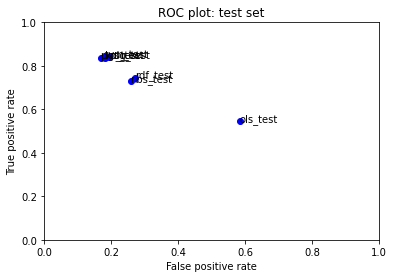

In [46]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [48]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='./moviereviews_test.tsv', my_random_seed=70, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 131072)
Size of combined bag of words and new quantitative variables matrix:
(25000, 131072)
(25000, 131072)
Shape of X_test for submission:
(25000, 131072)
SUCCESS!
are you working?
Number of rows in the submission test set (should be 25,000): 


---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [49]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.5464


In [50]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [51]:
my_submission.head()

,id,prediction
0,12311_10,0
1,8348_2,0
2,5828_4,1
3,7186_2,0
4,12128_7,0


In [52]:
my_submission.shape

(25000, 2)

In [53]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('./moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation